In [1]:
import torch
from mamil.models import MAMIL1D
from mamil.utils import get_class_balancing_weights, make_test_plots
from mamil.datasets import MnistBags
from mamil.training import Args, train_model
import torch.utils.data as data_utils
from pathlib import Path

In [2]:
args = Args(num_bags_train=10000, seed=123)

torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

train_set = MnistBags(
    target_number=args.target_number,
    neighbour_number=args.neighbour_number,
    mean_bag_length=args.mean_bag_length,
    var_bag_length=args.var_bag_length,
    num_bag=args.num_bags_train,
    seed=args.seed,
    train=True
)

train_weights = get_class_balancing_weights(train_set)
train_sampler = data_utils.WeightedRandomSampler(train_weights, len(train_weights))
train_shuffle = False  # no need to shuffle, because the sampler is used

loader_kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}
train_loader = data_utils.DataLoader(
    train_set,
    batch_size=1,
    shuffle=train_shuffle,
    sampler=train_sampler,
    **loader_kwargs
)

In [3]:
model = MAMIL1D().double()
if args.cuda:
    model.cuda()

checkpoints_path = Path('checkpoints/') / f'{args.num_bags_train}__{args.seed}'
checkpoints_path.mkdir(exist_ok=True, parents=True)
model = train_model(
    model,
    args,
    train_loader,
    checkpoints_path=checkpoints_path
)

Init conv
<class 'torch.nn.modules.activation.ReLU'> is not initialized
<class 'torch.nn.modules.pooling.MaxPool2d'> is not initialized
Init conv
<class 'torch.nn.modules.activation.ReLU'> is not initialized
<class 'torch.nn.modules.pooling.MaxPool2d'> is not initialized
Init linear
<class 'torch.nn.modules.activation.ReLU'> is not initialized
Start Training
Epoch: 1, Loss: 0.2269, Train error: 0.0931
Epoch: 2, Loss: 0.0974, Train error: 0.0274
Epoch: 3, Loss: 0.0734, Train error: 0.0228
Epoch: 4, Loss: 0.0490, Train error: 0.0140
Epoch: 5, Loss: 0.0553, Train error: 0.0137
Epoch: 6, Loss: 0.0493, Train error: 0.0134
Epoch: 7, Loss: 0.0499, Train error: 0.0168
Epoch: 8, Loss: 0.0365, Train error: 0.0103
Epoch: 9, Loss: 0.0327, Train error: 0.0087
Epoch: 10, Loss: 0.0394, Train error: 0.0101
Epoch: 11, Loss: 0.0413, Train error: 0.0122
Epoch: 12, Loss: 0.0238, Train error: 0.0059
Epoch: 13, Loss: 0.0243, Train error: 0.0064
Epoch: 14, Loss: 0.0276, Train error: 0.0084
Epoch: 15, Loss: 0

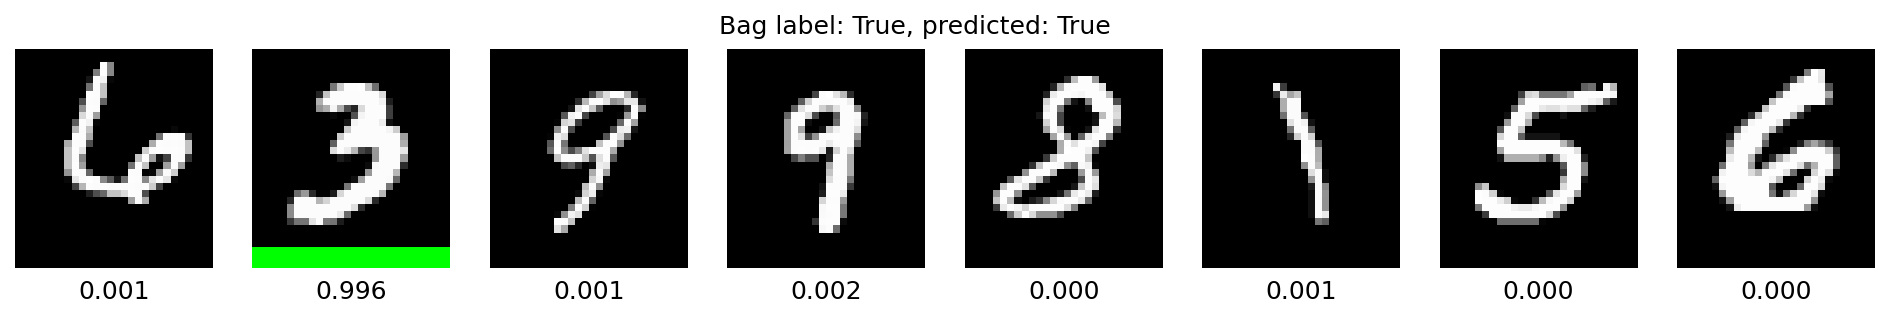

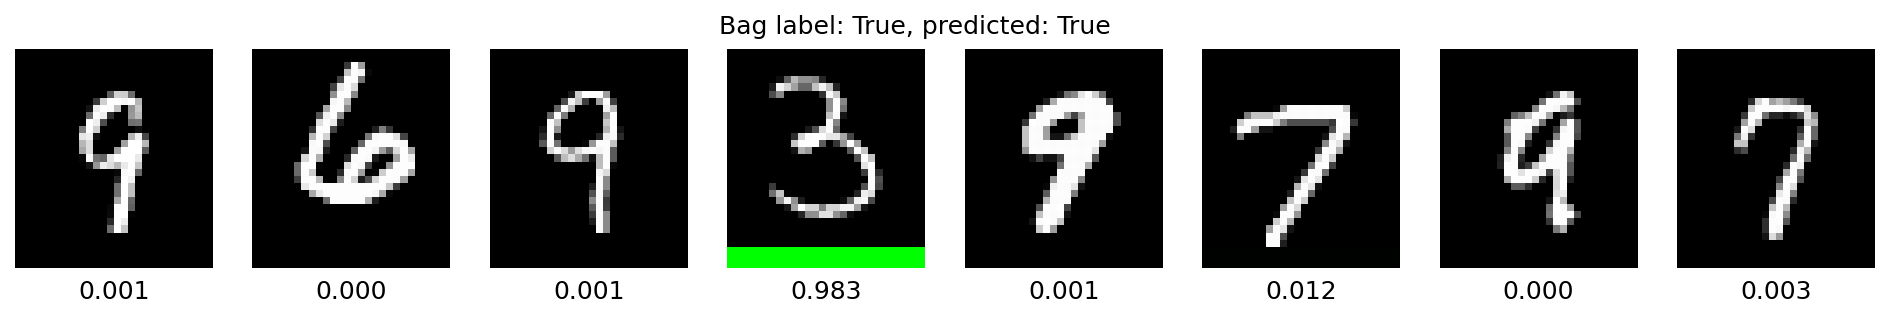

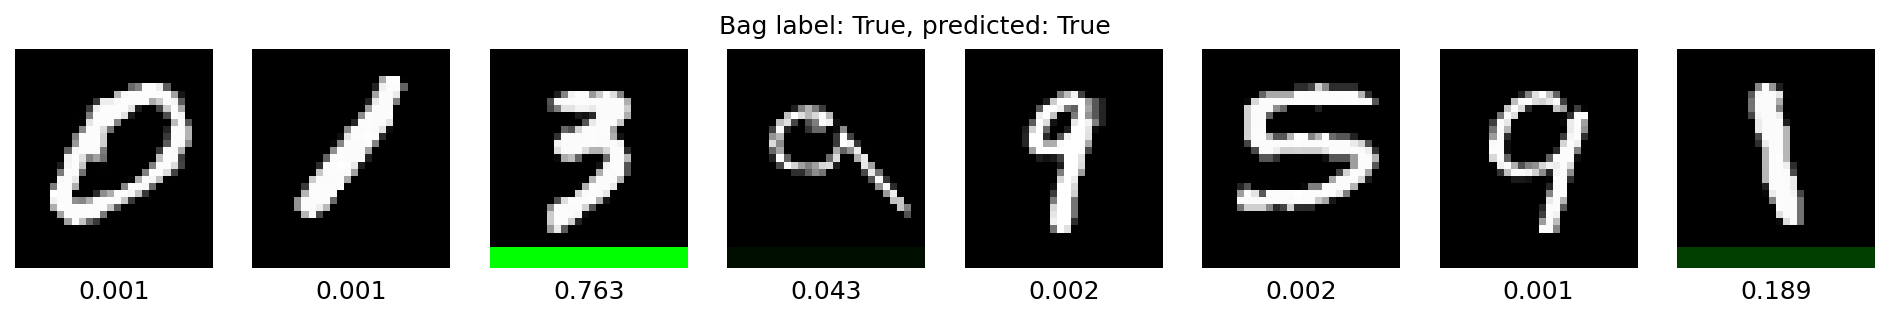

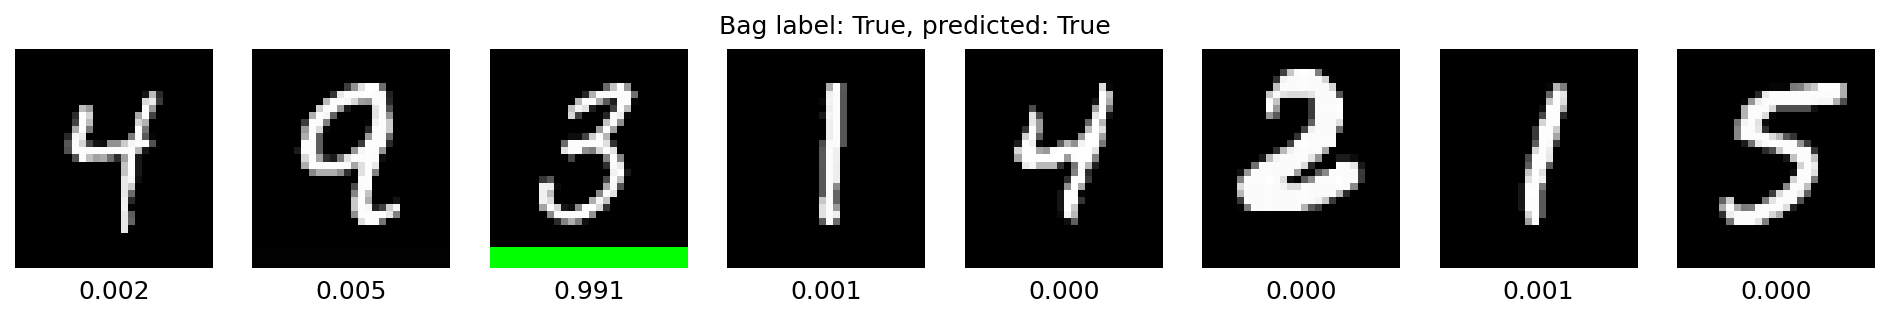

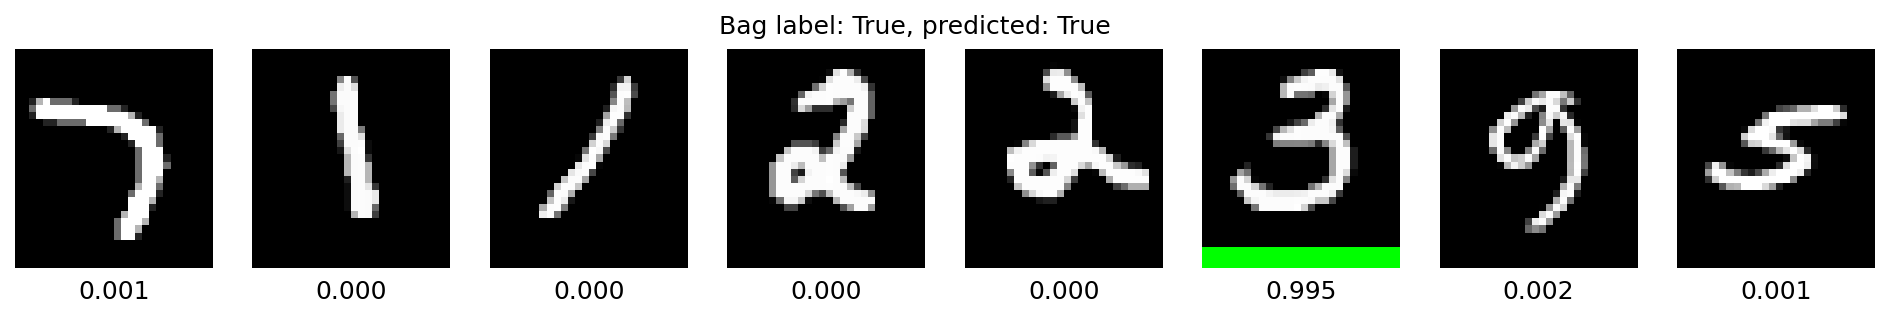

In [4]:
plots_data_loader = data_utils.DataLoader(
    MnistBags(
        target_number=args.target_number,
        neighbour_number=args.neighbour_number,
        mean_bag_length=8,
        var_bag_length=0,
        num_bag=1000,
        seed=args.seed,
        train=False
    ),
    batch_size=1,
    shuffle=False,
    **loader_kwargs
)

make_test_plots(
    model,
    plots_data_loader,
    args,
    n_images=5,
    only='true_positive',
    verbose=False,
    save_dir=Path('plots')
)